<a href="https://colab.research.google.com/github/mrvzay/Food-vision-101-CNN/blob/main/Food_vision_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get the data

Because **convolutional neural** networks work so well with images, to learn more about them, we're going to start with a dataset of images.

[Food-101](https://www.kaggle.com/datasets/dansbecker/food-101) dataset, real-world images of food dishes.

To begin, we're only going to use two of the categories, pizza 🍕 and steak 🥩.

Download the `pizza_steak` sebset zip file and unzip it.

In [128]:
# Import google drive
from google.colab import drive

In [129]:
# import zip file from google drive (zip file of pizza_steak images)
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [130]:
import zipfile

# Unzip import file (pizz_steak.zip)
zip_reference = zipfile.ZipFile("/content/drive/MyDrive/Datasets/pizza_steak.zip")
zip_reference.extractall()
zip_reference.close()

### Inspect the data

The file structure has been formatted to be in a typical of format you might use for working with images.

Dataset looks like ->

Example of file structure

pizza_steak <- top level folder



└───train <- training images



│   └───pizza

│   │   │   1008104.jpg

│   │   │   1638227.jpg
│   │   │   ...

│   └───steak
│       │   1000205.jpg

│       │   1647351.jpg
│       │   ...
│   




└───test <- testing images


│   └───pizza

│   │   │   1001116.jpg

│   │   │   1507019.jpg
│   │   │   ...   

│   └───steak

│       │   100274.jpg

│       │   1653815.jpg
│       │   ...



Let's inspect each of the directories.

use the command `ls` which stands for list.

In [131]:
!ls pizza_steak

test  train


see the `train` and `test` sets

In [132]:
!ls pizza_steak/train

pizza  steak


Take look inside `steak` directory ?


In [133]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [134]:
import os 

# Walk through pizza_steatk directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [135]:
# Another way to find how many images are in a file
num_steak_image_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_image_train

750

In [136]:
# Get the class names (programatically)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [137]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory
  target_folder = target_dir + target_class
  
  # random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Image plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape : {img.shape}")

  return img

Image shape : (512, 308, 3)


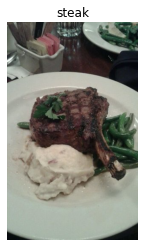

In [138]:
# View aradnom image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [139]:
# View the img (array/tensor)
img

array([[[100,  92,  89],
        [ 84,  76,  73],
        [ 82,  75,  69],
        ...,
        [147, 130, 122],
        [142, 125, 117],
        [148, 131, 123]],

       [[ 81,  76,  72],
        [ 74,  66,  63],
        [ 78,  71,  65],
        ...,
        [150, 142, 131],
        [156, 148, 137],
        [164, 156, 145]],

       [[ 71,  66,  62],
        [ 68,  63,  59],
        [ 78,  70,  67],
        ...,
        [146, 153, 137],
        [143, 150, 134],
        [143, 150, 134]],

       ...,

       [[  7,  11,  14],
        [  7,  11,  14],
        [  7,  11,  14],
        ...,
        [  9,  11,   8],
        [ 10,  12,   9],
        [ 11,  13,  10]],

       [[  8,  12,  15],
        [  8,  12,  15],
        [  7,  11,  14],
        ...,
        [ 10,  12,   9],
        [ 10,  12,   9],
        [ 11,  13,  10]],

       [[  8,  12,  15],
        [  8,  12,  15],
        [  7,  11,  14],
        ...,
        [ 10,  12,   9],
        [ 10,  12,   9],
        [ 11,  13,  10]]

In [140]:
# View the image shape
img.shape

(512, 308, 3)

In [141]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.39215686, 0.36078431, 0.34901961],
        [0.32941176, 0.29803922, 0.28627451],
        [0.32156863, 0.29411765, 0.27058824],
        ...,
        [0.57647059, 0.50980392, 0.47843137],
        [0.55686275, 0.49019608, 0.45882353],
        [0.58039216, 0.51372549, 0.48235294]],

       [[0.31764706, 0.29803922, 0.28235294],
        [0.29019608, 0.25882353, 0.24705882],
        [0.30588235, 0.27843137, 0.25490196],
        ...,
        [0.58823529, 0.55686275, 0.51372549],
        [0.61176471, 0.58039216, 0.5372549 ],
        [0.64313725, 0.61176471, 0.56862745]],

       [[0.27843137, 0.25882353, 0.24313725],
        [0.26666667, 0.24705882, 0.23137255],
        [0.30588235, 0.2745098 , 0.2627451 ],
        ...,
        [0.57254902, 0.6       , 0.5372549 ],
        [0.56078431, 0.58823529, 0.5254902 ],
        [0.56078431, 0.58823529, 0.5254902 ]],

       ...,

       [[0.02745098, 0.04313725, 0.05490196],
        [0.02745098, 0.04313725, 0.05490196],
        [0.02745098, 0

Why pixel values 0 & 1 and because tensorflow can't handle stringsa and images.

### Build fist model

The first model replicate [CNN explainer webpage](https://poloclub.github.io/cnn-explainer/).


In [142]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preproces data (get all of the pixel vlues bwtween 0 and 1)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test path
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Data turn into bathes
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # Default batch size
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
vgg_model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # (2, 2)
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # Binray activation fuction sigmoid
])

# Compile the model
vgg_model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  optimizer=tf.keras.optimizers.Adam(),# default learning_rate 0.001
                  metrics=["accuracy"])

# Fit the model
vgg_history_model = vgg_model.fit(train_data,
                                  epochs=5,
                                  steps_per_epoch=len(train_data),
                                  validation_data=valid_data,
                                  validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


47/47 [==============================] - 12s 236ms/step - loss: 0.5964 - accuracy: 0.6647 - val_loss: 0.4948 - val_accuracy: 0.7580
Epoch 2/5
47/47 [==============================] - 10s 210ms/step - loss: 0.4702 - accuracy: 0.7760 - val_loss: 0.3533 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 10s 208ms/step - loss: 0.4135 - accuracy: 0.8273 - val_loss: 0.3741 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 10s 221ms/step - loss: 0.3553 - accuracy: 0.8553 - val_loss: 0.3222 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 11s 235ms/step - loss: 0.2886 - accuracy: 0.8807 - val_loss: 0.3363 - val_accuracy: 0.8500


In [143]:
# Model summary
vgg_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_30 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_32 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 flatten_8 (Flatten)         (None, 112360)            0         
                                                      

Vgg_model very slow running each epoch more then one minute, toally five epoch 10 minutes.


** using `GPU` Recreate agin and rerun again, this time less code.**

In [144]:
# Check the GPU
!nvidia-smi

Mon Jun 20 11:32:14 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P0    29W /  70W |   2328MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [145]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-d54e911a-17f6-8c46-67c9-c89b59464808)


In [146]:
# Make the crating of our model a little easiear
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential

In [147]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preproces data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test path
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Data turn into bathes
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # Default batch size
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# same as the above model this time using GPU runn
vgg_model_2 = Sequential([
  Conv2D(filters=10,
        kernel_size=3,
        activation="relu",
        input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(2),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  Flatten(),
  Dense(1, activation="sigmoid") 
])

# Compile the model
vgg_model_2.compile(loss="binary_crossentropy",
                  optimizer=Adam(),
                  metrics=["accuracy"])

# Fit the model
vgg_history_model_2 = vgg_model.fit(train_data,
                                  epochs=5,
                                  steps_per_epoch=len(train_data),
                                  validation_data=valid_data,
                                  validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 10s 209ms/step - loss: 0.2072 - accuracy: 0.9233 - val_loss: 0.3309 - val_accuracy: 0.8580
Epoch 2/5
47/47 [==============================] - 11s 229ms/step - loss: 0.1151 - accuracy: 0.9620 - val_loss: 0.4742 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 9s 200ms/step - loss: 0.0716 - accuracy: 0.9773 - val_loss: 0.4958 - val_accuracy: 0.8100
Epoch 4/5
47/47 [==============================] - 9s 202ms/step - loss: 0.0276 - accuracy: 0.9973 - val_loss: 0.5781 - val_accuracy: 0.8120
Epoch 5/5
47/47 [==============================] - 12s 265ms/step - loss: 0.0097 - accuracy: 0.9993 - val_loss: 0.5778 - val_accuracy: 0.8360


Ohhh my goodness!

Using GPU each epoch less than 10 secnds, totally running model one minute.

## Model 3

#### Data augmentation

In [148]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20,
                                             shear_range=0.2, 
                                             zoom_range=0.2, 
                                             width_shift_range=0.2, 
                                             height_shift_range=0.2, 
                                             horizontal_flip=True)
# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [149]:
from traitlets.traitlets import ForwardDeclaredInstance
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle 


print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [150]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() 

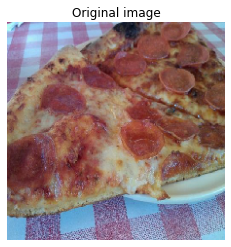

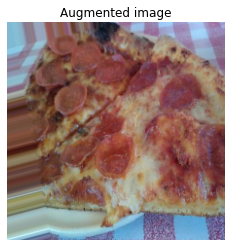

In [151]:
# Show original image and augmented image
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [152]:
# Create the model (same as model_5)
model_3 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 27s 554ms/step - loss: 0.7044 - accuracy: 0.4633 - val_loss: 0.6650 - val_accuracy: 0.7440
Epoch 2/5
47/47 [==============================] - 23s 493ms/step - loss: 0.6760 - accuracy: 0.6253 - val_loss: 0.6266 - val_accuracy: 0.6320
Epoch 3/5
47/47 [==============================] - 23s 490ms/step - loss: 0.6563 - accuracy: 0.6353 - val_loss: 0.5544 - val_accuracy: 0.7400
Epoch 4/5
47/47 [==============================] - 23s 488ms/step - loss: 0.6576 - accuracy: 0.5740 - val_loss: 0.5856 - val_accuracy: 0.6440
Epoch 5/5
47/47 [==============================] - 23s 491ms/step - loss: 0.6049 - accuracy: 0.6973 - val_loss: 0.4899 - val_accuracy: 0.7600


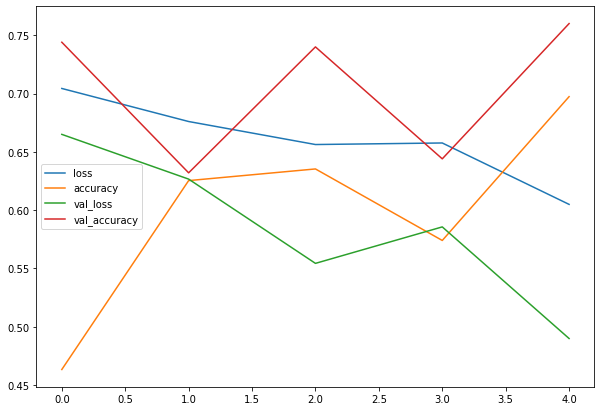

In [153]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_3.history).plot(figsize=(10, 7));

In [154]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

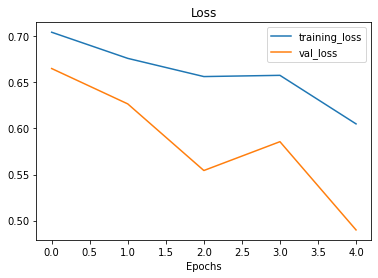

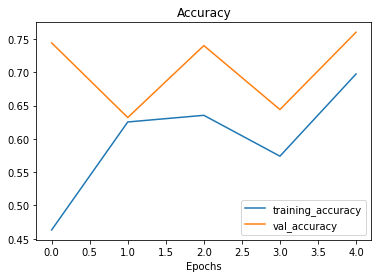

In [155]:
# Check out the loss curves of model_3
plot_loss_curves(history_3)

In [156]:
# Get the summary
model_3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 26, 26, 10)     

## Model 4

In [157]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 1500 images belonging to 2 classes.


In [158]:
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
model_4 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_4 = model_4.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 505ms/step - loss: 0.6557 - accuracy: 0.5907 - val_loss: 0.5520 - val_accuracy: 0.7320
Epoch 2/5
47/47 [==============================] - 24s 504ms/step - loss: 0.5660 - accuracy: 0.7107 - val_loss: 0.3902 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 24s 514ms/step - loss: 0.5084 - accuracy: 0.7507 - val_loss: 0.3939 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 24s 514ms/step - loss: 0.4834 - accuracy: 0.7733 - val_loss: 0.3643 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 24s 505ms/step - loss: 0.4563 - accuracy: 0.8020 - val_loss: 0.3153 - val_accuracy: 0.8720


In [159]:
# Get the usmmary
model_4.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_41 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_43 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                

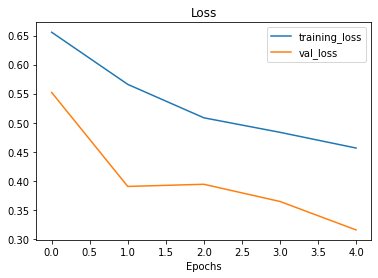

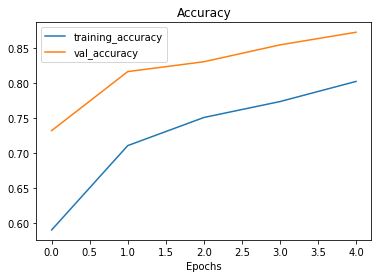

In [160]:
# check out the Tloss curves
plot_loss_curves(history_4)

### Make a predictions with out trained model

In [161]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


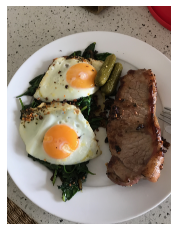

In [162]:
steak = mpimg.imread("/content/drive/MyDrive/Images/03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [163]:
steak.shape

(4032, 3024, 3)

In [164]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [165]:
# Load in and preprocess our custom image
steak = load_and_prep_image("/content/drive/MyDrive/Images/03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [172]:
# Make predictions
model_4.predict(steak)

array([[0.8133079]], dtype=float32)

In [168]:
# Add an extra axis
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) 
print(f"Shape after new dimension: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [173]:
# Make a prediction on custom image tensor
pred = model_4.predict(steak)
pred

array([[0.8133079]], dtype=float32)

In [174]:
# class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [175]:
# We can index the predicted class by roundign the predictions probility
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [176]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

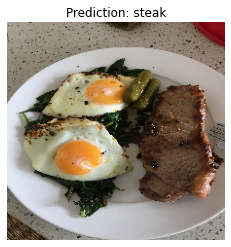

In [177]:
# Test our model on a custom image
pred_and_plot(model_4, "/content/drive/MyDrive/Images/03-steak.jpeg", class_names)

Nice! Our model got the prediction right.

Let's try one more image

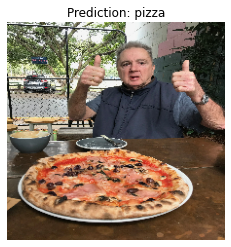

In [178]:
# Make another image
pred_and_plot(model_4, "/content/drive/MyDrive/Images/03-pizza-dad.jpeg", class_names)

Two thumbs up! Woohoo!

### Multi-class Classification

In [179]:
import zipfile

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Datasets/10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

In [180]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.

Looks good!

We'll now setup the training and test directory paths.

In [181]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

Image shape : (512, 512, 3)


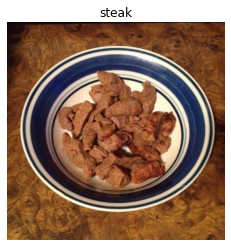

In [182]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

Time to preprocess the data.

In [183]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### Model 5:

In [184]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_4, except to be multi-class)
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') 
])

# Compile the model
model_5.compile(loss="categorical_crossentropy", 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [185]:
# Fit the model
history_5 = model_5.fit(train_data, # now 10 different classes 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 52s 219ms/step - loss: 2.1332 - accuracy: 0.2184 - val_loss: 1.9988 - val_accuracy: 0.2720
Epoch 2/5
235/235 [==============================] - 48s 205ms/step - loss: 1.8462 - accuracy: 0.3589 - val_loss: 1.8641 - val_accuracy: 0.3448
Epoch 3/5
235/235 [==============================] - 49s 209ms/step - loss: 1.3546 - accuracy: 0.5501 - val_loss: 2.0273 - val_accuracy: 0.3296
Epoch 4/5
235/235 [==============================] - 48s 206ms/step - loss: 0.6406 - accuracy: 0.7963 - val_loss: 2.9023 - val_accuracy: 0.2980
Epoch 5/5
235/235 [==============================] - 48s 202ms/step - loss: 0.2128 - accuracy: 0.9340 - val_loss: 4.2903 - val_accuracy: 0.2616


In [186]:
# Evaluate on the test data
model_5.evaluate(test_data)

79/79 [==============================] - 11s 143ms/step - loss: 4.2903 - accuracy: 0.2616


[4.290266990661621, 0.26159998774528503]

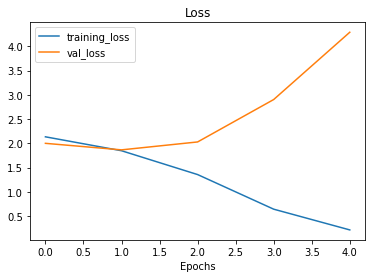

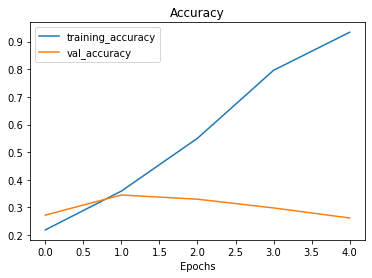

In [187]:
# Check out the model's loss curves on the 10 classes of data 
plot_loss_curves(history_5)

### Model 6:

In [188]:
# Try a simplified model (removed two layers)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_6.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_6 = model_6.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 46s 193ms/step - loss: 2.1701 - accuracy: 0.2379 - val_loss: 1.9602 - val_accuracy: 0.3076
Epoch 2/5
235/235 [==============================] - 45s 192ms/step - loss: 1.7315 - accuracy: 0.4209 - val_loss: 1.8334 - val_accuracy: 0.3620
Epoch 3/5
235/235 [==============================] - 46s 197ms/step - loss: 1.3449 - accuracy: 0.5635 - val_loss: 1.9124 - val_accuracy: 0.3432
Epoch 4/5
235/235 [==============================] - 45s 191ms/step - loss: 0.8752 - accuracy: 0.7316 - val_loss: 2.2701 - val_accuracy: 0.3044
Epoch 5/5
235/235 [==============================] - 45s 191ms/step - loss: 0.5011 - accuracy: 0.8608 - val_loss: 2.6753 - val_accuracy: 0.3096


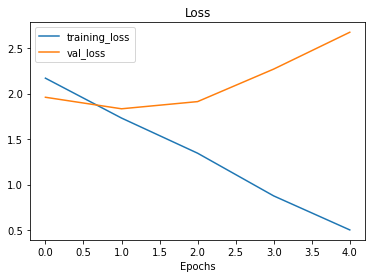

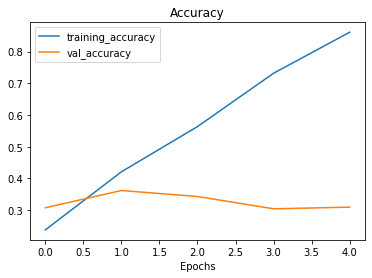

In [189]:
# Check out the loss curves of model_10
plot_loss_curves(history_6)

**Data augmentation**

In [190]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, 
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [191]:
# Clone the model (use the same architecture)
model_7 = tf.keras.models.clone_model(model_6)

# Compile the cloned model (same setup as used for model_10)
model_7.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 116s 491ms/step - loss: 2.1963 - accuracy: 0.2020 - val_loss: 2.0205 - val_accuracy: 0.2828
Epoch 2/5
235/235 [==============================] - 114s 485ms/step - loss: 2.0508 - accuracy: 0.2835 - val_loss: 1.9182 - val_accuracy: 0.3416
Epoch 3/5
235/235 [==============================] - 113s 479ms/step - loss: 2.0133 - accuracy: 0.2961 - val_loss: 1.9109 - val_accuracy: 0.3080
Epoch 4/5
235/235 [==============================] - 119s 506ms/step - loss: 1.9702 - accuracy: 0.3176 - val_loss: 1.8957 - val_accuracy: 0.3304
Epoch 5/5
235/235 [==============================] - 114s 485ms/step - loss: 1.9228 - accuracy: 0.3360 - val_loss: 1.8741 - val_accuracy: 0.3516


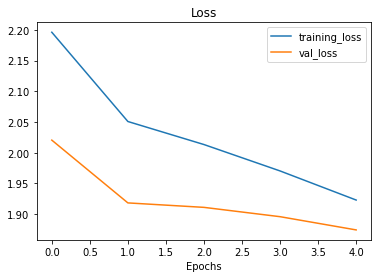

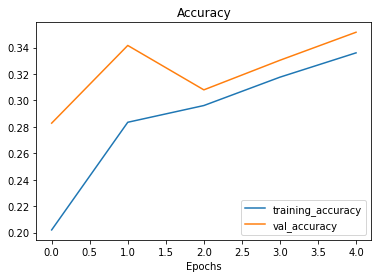

In [192]:
# Check out our model's performance with augmented data
plot_loss_curves(history_7)

Making a prediction with our trained model

In [193]:
# What classes has our model been trained on?
class_names

array(['pizza', 'steak'], dtype='<U5')

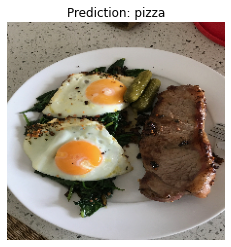

In [194]:
# Make a prediction using model_7
pred_and_plot(model=model_7, 
              filename="/content/drive/MyDrive/Images/03-steak.jpeg", 
              class_names=class_names)

our model got the prediction wrong, how about we try another?

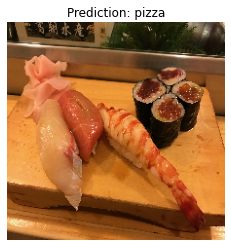

In [195]:
pred_and_plot(model_7, "/content/drive/MyDrive/Images/03-sushi.jpeg", class_names)

And again, it's predicting chicken_curry for some reason, one more?

There must be wrong!...

Maybe function maybe going wrong `pred_and_plot` wrong.

In [206]:
# Check the output of the predict function
# pred = model_7.predict(tf.expand_dims(img, axis=0))
# pred

In [207]:
# Load in and preprocess our custom image
# img = load_and_prep_image("03-steak.jpeg")

# # Make a prediction
# pred = model_7.predict(tf.expand_dims(img, axis=0))

# # Match the prediction class to the highest prediction probability
# pred_class = class_names[pred.argmax()]
# plt.imshow(img)
# plt.title(pred_class)
# plt.axis(False);

In [204]:
# # Adjust function to work with multi-class
# def pred_and_plot(model, filename, class_names):
#   """
#   Imports an image located at filename, makes a prediction on it with
#   a trained model and plots the image with the predicted class as the title.
#   """
#   # Import the target image and preprocess it
#   img = load_and_prep_image(filename)

#   # Make a prediction
#   pred = model.predict(tf.expand_dims(img, axis=1))

#   # Get the predicted class
#   if len(pred[0]) > 1: # check for multi-class
#     pred_class = class_names[pred.argmax()] 
#   else:
#     pred_class = class_names[int(tf.round(pred)[0][0])] 

#   # Plot the image and predicted class
#   plt.imshow(img)
#   plt.title(f"Prediction: {pred_class}")
#   plt.axis(False);

In [203]:
# pred_and_plot(model_7, "/content/drive/MyDrive/Images/03-sushi.jpeg", class_names)

### Saving and loading our model

In [200]:
# Save a model
model_7.save("saved_trained_model")

INFO:tensorflow:Assets written to: saved_trained_model/assets


In [201]:
# Load in a model and evaluate it
loaded_model_7 = tf.keras.models.load_model("saved_trained_model")
loaded_model_7.evaluate(test_data)

79/79 [==============================] - 15s 189ms/step - loss: 1.8741 - accuracy: 0.3516


[1.8741412162780762, 0.3515999913215637]

In [202]:
# Compare our unsaved model's results (same as above)
model_7.evaluate(test_data)

79/79 [==============================] - 15s 184ms/step - loss: 1.8741 - accuracy: 0.3516


[1.874141812324524, 0.3515999913215637]